<a href="https://colab.research.google.com/github/TaruSora/NLP_100knock/blob/main/100knock_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install mecab libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [ ]:
!mecab -o neko.txt.mecab neko.txt

In [ ]:
!head -n 15 neko.txt.mecab

この	連体詞,*,*,*,*,*,この,コノ,コノ
太平	名詞,一般,*,*,*,*,太平,タイヘイ,タイヘイ
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
得る	動詞,自立,*,*,一段,基本形,得る,エル,エル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
太平	名詞,一般,*,*,*,*,太平,タイヘイ,タイヘイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
死な	動詞,自立,*,*,五段・ナ行,未然形,死ぬ,シナ,シナ
なけれ	助動詞,*,*,*,特殊・ナイ,仮定形,ない,ナケレ,ナケレ
ば	助詞,接続助詞,*,*,*,*,ば,バ,バ
得	動詞,自立,*,*,一段,未然形,得る,エ,エ
られ	動詞,接尾,*,*,一段,未然形,られる,ラレ,ラレ
ぬ	助動詞,*,*,*,特殊・ヌ,基本形,ぬ,ヌ,ヌ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
南無阿弥陀仏	名詞,一般,*,*,*,*,南無阿弥陀仏,ナムアミダブツ,ナムアミダブツ
南無阿弥陀仏	名詞,一般,*,*,*,*,南無阿弥陀仏,ナムアミダブツ,ナムアミダブツ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
ありがたい	形容詞,自立,*,*,形容詞・アウオ段,基本形,ありがたい,アリガタイ,アリガタイ
ありがたい	形容詞,自立,*,*,形容詞・アウオ段,基本形,ありがたい,アリガタイ,アリガタイ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS


In [ ]:
!pip install japanize_matplotlib

30.形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [ ]:
# 30

sentences = []
result = []
with open('neko.txt.mecab') as f:
    for line in f: 
        if line != 'EOS\n':
            ls = line.split('\t')
            if len(ls) != 2 or ls[0] == '':
                continue
            else:
                tmp =  ls[1].split(',')
                morph = {'surface': ls[0], 'base': tmp[6], 'pos': tmp[0], 'pos1': tmp[1]}
                result.append(morph)
        else:
            sentences.append(result)
            result = []

for morph in sentences[2]:
  print(morph)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


31.動詞の表層形をすべて抽出せよ．

In [ ]:
# 31

result = set()
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
            result.add(morph['surface'])

print(result)

{'向っ', 'すみ', '続か', '損ね', '携え', 'や', '居', '心掛け', '違っ', '佇ん', '寝転ぶ', 'し', '焦がれ', '振る', '抜か', '汚れ', '禿げる', '試みる', 'がかっ', '仰向き', '掛け', '止め', '弱り', 'いそが', '磨い', '刻ん', '属し', 'さておい', '苦しん', '感ぜ', '鳴る', '嘯い', '飽き飽きし', '気に入ら', 'たまる', 'さすっ', '召し', '終', '飛び', 'なげ', '忘れる', 'とりとめ', '寄りつか', '持て余す', '食っ', 'きる', '通り', '疲れ', '登ら', 'しつけ', '因っ', '片付い', '飲ま', 'いざっ', 'かざら', '恐れ入っ', '立ち上がっ', '借りる', '睨ま', 'わかっ', '越せ', 'だい', '告げる', '突っつい', 'ぶら下がっ', '煎じ', '脱し', '飲み込ん', '致そ', '心付い', '立て', 'がり', 'もとづく', '曝さ', '値する', '満ち', '増し', '見や', '心付か', '預っ', '敬い', '浮く', '忍ん', '吐き', '荒立て', '詠ん', '拱い', '禁ずる', '廃せ', 'しから', 'から', 'いる', '殖えれ', '填め', '沈めろ', '弾き出す', 'どやし', 'くだら', 'はっ', '片付く', '望ん', 'きか', '持た', 'ねじ上げ', '落つ', '持ち切っ', '下ら', '司', '産まれ', '始まる', '試し', 'かえし', 'のぼら', '過ぎる', '隠れ', '誂える', '慣れ', '掘り', '跳ね返し', 'こせつい', 'づけ', '振', '果せる', '取ら', 'ふくれ', '動かし', '覚える', '隔て', '罹る', '繙け', '勝た', 'みよ', '迷っ', 'もうし', '留っ', '下さっ', 'うたい', '縫う', '食え', '捨てる', 'こびりつい', '確かめ', '喩える', '敗れ', '守る', 'はす', '撓る', '押し出す', '上がん', 'こすり', '競っ', '抗する', '後

32.動詞の基本形をすべて抽出せよ．

In [ ]:
# 32

result = set()
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
            result.add(morph['base'])

print(result)

{'張り切れる', '狼狽える', '浮べる', '寝転ぶ', '煩わす', '振る', '試みる', '禿げる', '動き出す', '契る', '誓う', 'つれる', '鳴る', 'ぶつ', 'たまる', '忘れる', '附す', '持て余す', 'きる', '滑らす', '睨み合う', '伺える', '借りる', '睡る', '告げる', 'のめる', '吸い取る', 'かきつける', 'あしらう', 'もとづく', '値する', '古ぼける', '使い分ける', '具える', 'しまる', '駆る', '浮く', '凝り固まる', '申し上げる', '禁ずる', 'いる', 'かざる', '弾き出す', '片付く', '落つ', '尖る', 'ほかなる', '始まる', '見かねる', '過ぎる', 'つき合う', '似る', 'ねだる', '誂える', '申し合せる', '除く', '見合せる', 'さます', '果せる', 'つかまる', '覚える', '罹る', '刺し通す', '退る', 'がする', '放り出す', '注ぐ', '縫う', '奪い合う', '劃する', '捨てる', '数える', 'もうす', '喩える', 'しきる', '守る', 'おれる', '写る', '押し出す', '撓る', 'いそぐ', '縫いつける', '抗する', '掛る', 'とろける', '進める', '判ずる', '化す', '呼びつける', 'ぬすむ', '知る', '起つ', '恋う', '打ち落す', 'したがう', '処する', '使う', '突っ込む', '注す', 'すわる', 'よごれる', '唱う', '数え立てる', '減ずる', '洩れる', '放る', 'まかる', '当てる', 'ゆるめる', '衒う', 'すくう', 'きせる', '開き直る', '恐る', 'こめる', '押しかける', '従う', '振り落とす', 'しつける', '奉じる', '散る', 'あける', '飼う', '漬ける', '過ごす', '感じ入る', '拾える', '採る', '回る', '洒落る', 'ふざける', 'つとめる', '見つめる', '静まり返る', 'あう', '損する', '立ち入る', '手伝う', '切り落す', '取り殺す', '

33.2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [ ]:
# 33

result = set()
for sentence in sentences:
    for i in range(1, len(sentence) -1):
        if sentence[i-1]['pos'] == '名詞' and sentence[i]['surface'] == 'の' and sentence[i+1]['pos'] == '名詞':
            result.add(sentence[i - 1]['surface'] + sentence[i]['surface'] + sentence[i + 1]['surface'])

print(result)

{'倫理の代り', '君子の袖', '敵の声', '世間の邪魔', '顔の中央', 'そこの雨戸', '冬の事', '両者の関係', '個の観念', '拝顔の栄', '供の事', '大抵のもの', 'シチュの形容', '粛の態', '禿の事', '寒月の令夫人', '人前の西洋', '療養の歴史', '人様の事', '紫の風呂敷', '何のそれ', '夢の枕', '顔の上', '今のよう', '例の書斎', '時間の出来事', '彼等の体操', 'いそのビール', '条の径路', '耳の立ち', '自然の傾向', '師の小説', '知名の文士', '全体の形', '群衆の上', '西洋の文明', '彼の首', '倫理の先生', 'こっちの随意', '唐津の住人', '吾輩の眼前', '吾輩の毛', '人間の嗜好', '活眼の士', '煙草の持ち主', '掌の裏', '猿股の勢力', '唐紙の傍', '没交渉の沙汰', '勝手次第の方角', '町の勧工場', '君の名前', '当時のまま', '子の訪問', 'ための方便', '未来の武', '不思議のよう', '君子の敵', '作用のため', '寒月の所', '先生のところ', '士の足音', '発達の一助', '主人の我儘', '先生の所', '意のまま', '笹原の中', '烏合の衆', '個の個性', '迷亭の返答', 'こちらの身分', '様のよう', '近所のゴロ', '質のもの', '蕪村の春風', '天職のよう', '妻君の顔', '僕の創作', '仲間のうち', 'トチメンボーの御馳走', '敵の策略', '君の後進', '人生の目的', '春の灯火', '狐付きのよう', '京都の黒谷', '運動の神聖', '竹の真似', '神の全智', '彼等の中間', '彼の皮膚', '自己の態度', '絶対の境', '蠅の眼', 'ばの前', '自然の勢', '女の悪口', '宇宙の真理', '全体の状況', '逆上の名', '猫の額', '迹の稀', '尻尾の重み', '花川戸の方', '今代の人', '以外の活動', '山高帽子の種類', '教育の結果', '書物の表紙', '頭の裏', '輪の中', 'さんの大声', '赤十字の総会', '見ず知らずの年長', '例の一大', '立の飯', '二つの間'

34.名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [ ]:
# 34 

result = set()
for sentence in sentences:
    linked = ''
    count = 0
    for morph in sentence:
        if morph['pos'] == '名詞':
            linked += morph['surface']
            count += 1
        elif morph['pos'] != '名詞' and count >= 2:
            result.add(linked)
            linked = ''
            count = 0
        else:
            linked = ''
            count = 0
    if count >= 2:
        result.add(linked)

print(result)

{'二週間', 'たまえ月十円', '三人鼎坐', '十二分の成績', '畸形児', '巡りさん', '麻裏草履', '五六十本半紙', '焼打以上', '結婚事件', '末勢', 'このほどじゅう', '七拝', '鷹台町', '東風君一人', '幸福さ', '古今来', 'みんな分', 'いかん懺悔', 'この間おさん', '先日鼻', '皆事', '二三遍拝聴', '牡蠣先生', '我々仲間', '歴史小説セオファーノ', '池越し', '日暮れ方', '代り鼻', '迷惑千万', '近所迷惑', '——泥棒', '平板尨大', '定業', '一枚一枚', '幕無し', '——御前世界', '朝風呂場', '当分多忙', '帯一筋——価', '教師たる者', '多々良三平君', '十時', '埃及煙草', '此間だれ', '蹲踞まり', '鴛鴦歌', '一人喧嘩', 'ゅうする者', '産婆営業勝手', '猫鍋', '活動小切手', '——適宜', '大分迷亭', '独創的', '朱盆', '三日', '廃そう', '七日目', '——吾輩', 'たちゃとうていあかんですばい', '肝胆相', '蒲原郡筍谷', '通り独逸語', 'さっき鈴木君', 'ハハハハこれ', 'とき三円二十銭', '仕舞物', '伯父さま', '男女間', '薩摩飛白', '全体山の上', '耐ら', '三十分', '沙弥さん', '夏さん', '西洋料理', '外濠線', '曰く火', '泥だらけ', '幅一尺', '限り系統的', '以太利', '儘卓上', '限り積極的方針', '維新前', '何点', '十日', '講釈師', '右眼', '一丁', 'びらかす', '団栗博士', '胃内', '宿場女郎', '二巻', '人為的', '怪狸', '不安心', 'ぐにゃり横', '寄木細工', '四百四病即席全快', '投函役', '新体詩会等', '手応', '七八両月', '不得要領底', '——容易', '飯焚', '羽織何点代価いくら', '二十日頃', 'うの領分', '二百', '長州征伐', '浅田宗伯', '消毒器', '眼付', '八寸', '婚儀上', '四十六目', '水瓜', '時寺内', '西洋通', '必竟ずる', '言草', '人間全体', 'か

35.文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [ ]:
# 35

from collections import Counter

count_list = []
for sentence in sentences: 
    for morph in sentence:
        if morph['pos'] != '記号':
            count_list.append(morph['base']) # count_list:カウントする単語を入れたリスト
count = Counter(count_list) # Counter():リストにある要素をカウントする関数
print(count.most_common()) # most_common():出現回数順に並べたリストを返す関数

[('の', 9194), ('て', 6848), ('は', 6420), ('に', 6243), ('を', 6071), ('だ', 5972), ('と', 5508), ('が', 5337), ('た', 4267), ('する', 3657), ('ない', 3052), ('も', 2479), ('ある', 2320), ('*\n', 2191), ('で', 2084), ('から', 2031), ('いる', 1777), ('ん', 1568), ('か', 1529), ('云う', 1408), ('事', 1207), ('です', 1164), ('ます', 1146), ('なる', 1120), ('へ', 1034), ('う', 987), ('もの', 981), ('君', 973), ('主人', 932), ('ぬ', 719), ('よう', 696), ('見る', 675), ('ね', 657), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('一', 554), ('そう', 546), ('何', 539), ('思う', 502), ('よ', 502), ('吾輩', 481), ('来る', 460), ('れる', 450), ('じゃ', 450), ('これ', 414), ('さ', 410), ('それ', 381), ('聞く', 347), ('でも', 346), ('時', 345), ('行く', 340), ('出来る', 324), ('三', 319), ('出る', 317), ('な', 317), ('まで', 313), ('ところ', 313), ('方', 312), ('やる', 311), ('二', 303), ('上', 294), ('いい', 294), ('寒月', 286), ('顔', 282), ('先生', 274), ('人間', 272), ('くらい', 269), ('僕', 268), ('ごとし', 261), ('さん', 260), ('気', 250), ('猫', 248), ('だけ', 246), ('たい', 241), ('また

36.出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

[('の', 9194), ('て', 6868), ('は', 6420), ('に', 6243), ('を', 6071), ('と', 5508), ('が', 5337), ('た', 3988), ('で', 3806), ('も', 2479)]


<BarContainer object of 10 artists>

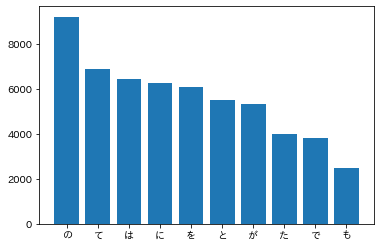

In [ ]:
# 36

N = 10
x = []
y = []
import matplotlib.pyplot as plt
import japanize_matplotlib

common_list = count.most_common(N) # common_list:出現頻度の高い10語のリスト
print(common_list)

for i in range(N):
    x.append(common_list[i][0]) # x:出現頻度の高い単語リスト
    y.append(common_list[i][1]) # y:出現回数のリスト
plt.bar(x, y)

37.「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

[('の', 391), ('は', 272), ('に', 250), ('を', 232), ('だ', 231), ('て', 229), ('と', 202), ('が', 180), ('する', 144), ('た', 140)]


<BarContainer object of 10 artists>

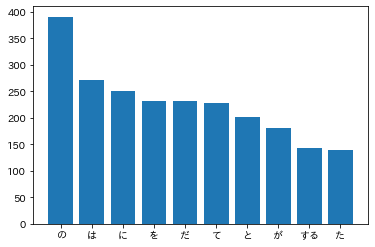

In [ ]:
# 37

from collections import Counter
import matplotlib.pyplot as plt
import japanize_matplotlib

N = 10
count_list = []
x = []
y = []
for sentence in sentences:
    if '猫' in [morph['surface'] for morph in sentence]:
        for morph in sentence:
            if morph['pos'] != '記号' and morph['surface'] != '猫':
                count_list.append(morph['base'])  # count_list:カウントする単語を入れたリスト              
count = Counter(count_list) # Counter():リストにある要素をカウントする関数
common_list = count.most_common(N) # most_common():出現回数順に並べたリストを返す関数
print(common_list)
for i in range(N):
    x.append(common_list[i][0]) # x:出現頻度の高い単語リスト
    y.append(common_list[i][1]) # y:出現回数のリスト
plt.bar(x, y)

38.単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

defaultdict(<class 'int'>, {'一': 554, '吾輩': 481, 'は': 6420, '猫': 248, 'だ': 5972, 'ある': 2320, '名前': 47, 'まだ': 115, '無い': 28, 'どこ': 118, 'で': 2084, '生れる': 40, 'た': 4267, 'か': 1529, 'とんと': 6, '見当': 13, 'が': 5337, 'つく': 108, 'ぬ': 719, '何': 539, 'でも': 346, '薄暗い': 3, 'じめじめ': 1, 'する': 3657, '所': 127, '*\n': 2191, '泣く': 29, 'て': 6848, 'いた事': 4, 'だけ': 246, '記憶': 22, 'いる': 1777, 'ここ': 96, '始める': 53, '人間': 272, 'という': 116, 'もの': 981, 'を': 6071, '見る': 675, 'しかも': 30, 'あと': 65, '聞く': 347, 'と': 5508, 'それ': 381, '書生': 35, '中': 234, '一番': 35, '獰悪': 1, '種族': 2, 'そう': 546, 'この': 649, 'の': 9194, '時々': 38, '我々': 7, '捕える': 10, '煮る': 10, '食う': 168, '話': 77, 'しかし': 185, 'その': 576, '当時': 17, '考': 29, 'も': 2479, 'ない': 3052, 'から': 2031, '別段': 30, '恐い': 8, 'いとも': 1, '思う': 502, 'ただ': 150, '彼': 134, '掌': 3, 'に': 6243, '載せる': 7, 'られる': 149, 'スー': 2, '持ち上げる': 3, '時': 345, '何だか': 70, 'フワフワ': 1, '感じ': 27, 'ばかり': 231, '上': 294, '少し': 172, '落ちつく': 18, '顔': 282, 'いわゆる': 18, '始': 1, 'う': 987, '妙': 88, '今': 195, '残る': 19, 

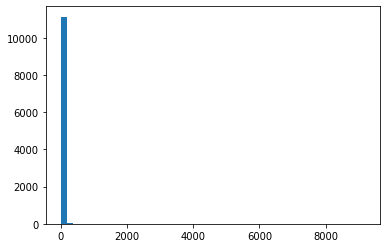

In [ ]:
# 38

from collections import defaultdict
import matplotlib.pyplot as plt
import japanize_matplotlib

count = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
        count[morph['base']] += 1 
print(count)
count = count.values()
print(count)
plt.hist(count, bins=50)
plt.show()

39.単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

defaultdict(<class 'int'>, {'一': 554, '吾輩': 481, 'は': 6420, '猫': 248, 'だ': 5972, 'ある': 2320, '名前': 47, 'まだ': 115, '無い': 28, 'どこ': 118, 'で': 2084, '生れる': 40, 'た': 4267, 'か': 1529, 'とんと': 6, '見当': 13, 'が': 5337, 'つく': 108, 'ぬ': 719, '何': 539, 'でも': 346, '薄暗い': 3, 'じめじめ': 1, 'する': 3657, '所': 127, '*\n': 2191, '泣く': 29, 'て': 6848, 'いた事': 4, 'だけ': 246, '記憶': 22, 'いる': 1777, 'ここ': 96, '始める': 53, '人間': 272, 'という': 116, 'もの': 981, 'を': 6071, '見る': 675, 'しかも': 30, 'あと': 65, '聞く': 347, 'と': 5508, 'それ': 381, '書生': 35, '中': 234, '一番': 35, '獰悪': 1, '種族': 2, 'そう': 546, 'この': 649, 'の': 9194, '時々': 38, '我々': 7, '捕える': 10, '煮る': 10, '食う': 168, '話': 77, 'しかし': 185, 'その': 576, '当時': 17, '考': 29, 'も': 2479, 'ない': 3052, 'から': 2031, '別段': 30, '恐い': 8, 'いとも': 1, '思う': 502, 'ただ': 150, '彼': 134, '掌': 3, 'に': 6243, '載せる': 7, 'られる': 149, 'スー': 2, '持ち上げる': 3, '時': 345, '何だか': 70, 'フワフワ': 1, '感じ': 27, 'ばかり': 231, '上': 294, '少し': 172, '落ちつく': 18, '顔': 282, 'いわゆる': 18, '始': 1, 'う': 987, '妙': 88, '今': 195, '残る': 19, 

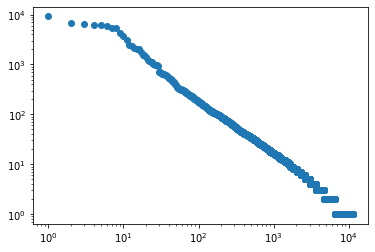

In [ ]:
#39

from collections import defaultdict
import matplotlib.pyplot as plt
import japanize_matplotlib
import math

count = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      count[morph['base']] += 1
print(count)
result = sorted(count.items(), key=lambda x:x[1], reverse=True)
print(result)
ranks = [r + 1 for r in range(len(result))]
values = [a[1] for a in result]
plt.scatter(ranks, values)
plt.xscale('log')
plt.yscale('log')
plt.show()